# Q1: Signature Matching
```
The signature image is our identity, banks and other places signatures are used, can youtake10 copies of
your signature and show that they represent you, we can use morphological operations like thinning, Skelton
Can we find bends and curves to identify them
Can we use envelope to make them more robust
```

## Approach

### Pre-Processing
- Gaussian Blur
- Morphological Opening
- Otsu Thresholding
- Morphological Opening

### Transformation ([Skeletonize](https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html))
- We use the `skimage` library function for skeleton transformation by thinning the thresholded image. This gives us a signature with only 1 pixel boundary
- Then we can save this as our reference skeleton

### Matching ([structural similarity](https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html#))
- We will use `skimage`'s structural similarity, to calculate the accuracy of the signature match

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [2]:
REFERENCE_IMAGE = "sign1.png"
TEST_IMAGE = "sign2.png"

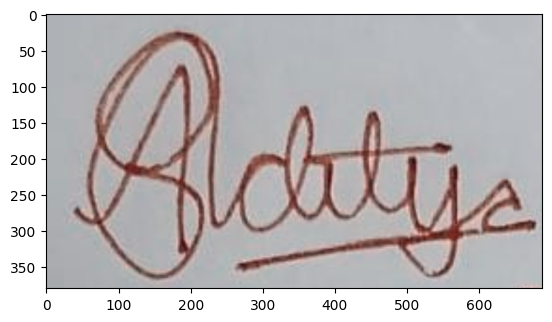

In [3]:
img = cv.imread(REFERENCE_IMAGE)
plt.imshow(img)

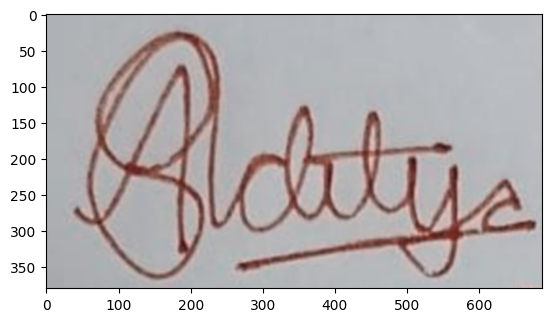

In [4]:
img_blur = cv.GaussianBlur(img, (5,5), None)
plt.imshow(img_blur)

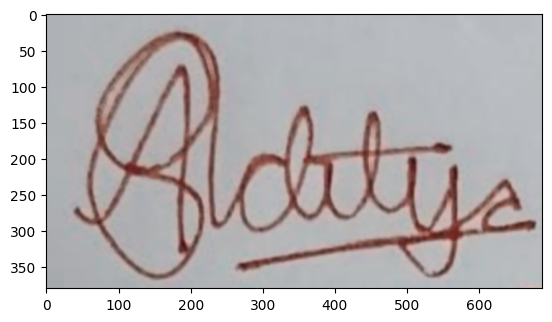

In [5]:
img_close = cv.morphologyEx(img_blur, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
plt.imshow(img_close)

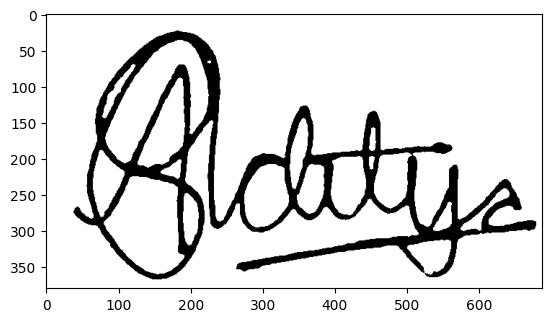

In [6]:
img_g = cv.cvtColor(img_close, cv.COLOR_BGR2GRAY)
_, bw = cv.threshold(img_g,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bw, cmap="gray")

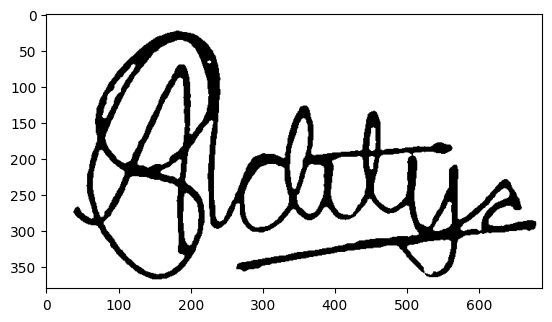

In [7]:
img_closed = cv.morphologyEx(bw, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
plt.imshow(img_closed, cmap="gray")

True

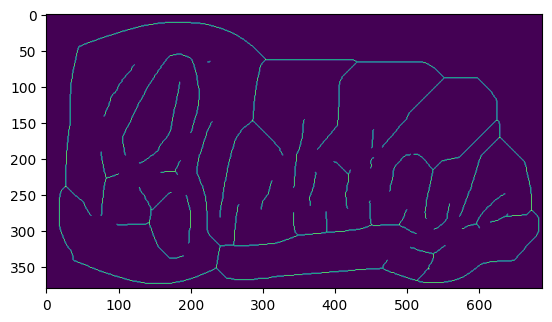

In [8]:
img_skeleton = skimage.morphology.skeletonize(img_closed)
img_skeleton = skimage.util.img_as_ubyte(img_skeleton)
plt.imshow(img_skeleton)
cv.imwrite("ref.jpg", img_skeleton)

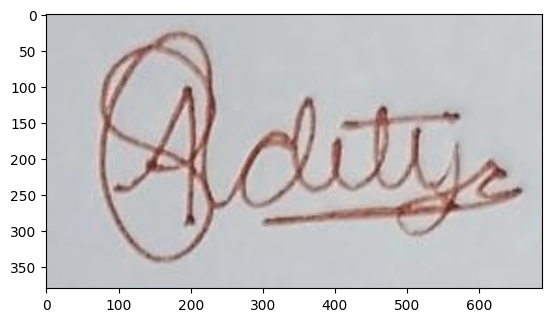

In [9]:
test = cv.imread(TEST_IMAGE)
plt.imshow(test)

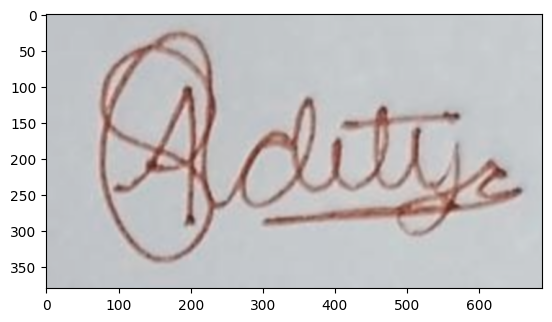

In [10]:
test_blur = cv.GaussianBlur(test, (5,5), None)
plt.imshow(test_blur)

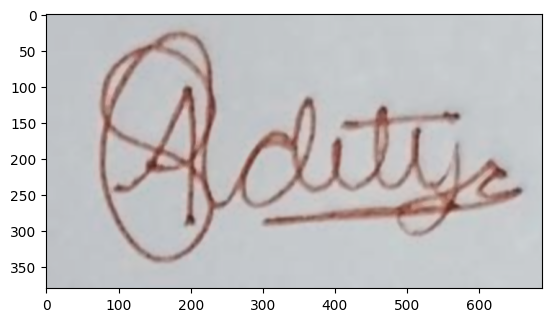

In [11]:
test_close = cv.morphologyEx(test_blur, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
plt.imshow(test_close)

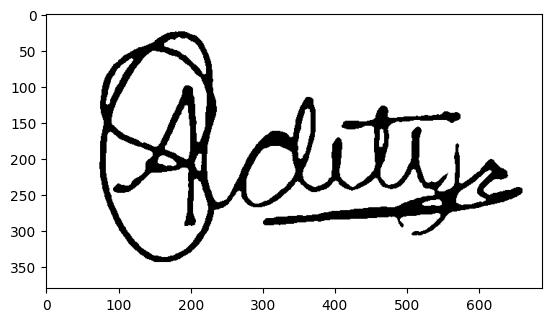

In [12]:
test_g = cv.cvtColor(test_close, cv.COLOR_BGR2GRAY)
_, test_bw = cv.threshold(test_g,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(test_bw, cmap="gray")

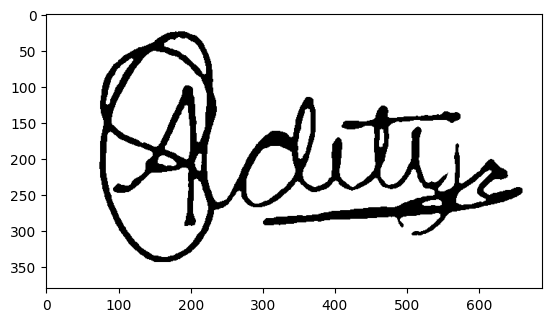

In [13]:
test_closed = cv.morphologyEx(test_bw, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
plt.imshow(test_closed, cmap="gray")

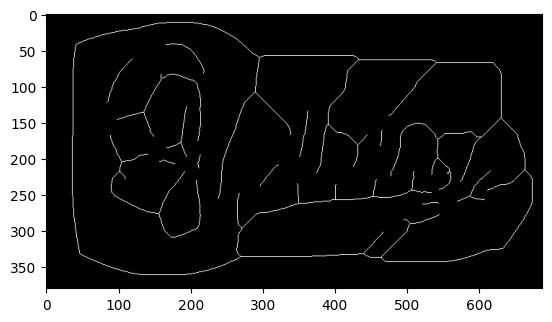

In [14]:
test_skeleton = skimage.morphology.skeletonize(test_closed)
test_skeleton = skimage.util.img_as_ubyte(test_skeleton)
test_skeleton = cv.resize(test_skeleton, (img_skeleton.shape[1], img_skeleton.shape[0]))
plt.imshow(test_skeleton, cmap="gray")

In [15]:
skimage.metrics.structural_similarity(img_skeleton, test_skeleton)

0.7153751527894728

# Result
We obtain a 71% match between 2 signatures